In [ ]:
try:
    import concrete.ml
except:
    import subprocess
    import IPython
    subprocess.check_output("pip install concrete-ml>=0.5.1", shell=True)
    IPython.Application.instance().kernel.do_shutdown(True)

In [ ]:
from sklearn.model_selection import train_test_split
from concrete.ml.sklearn import LogisticRegression
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Fraudulent_E-Commerce_Transaction_Data_2.csv')

In [ ]:
df

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,d8b7171f-bdd9-479c-b98b-396c621aebfe,98a3d94c-dc9a-4525-b273-e6ffe54cc5a4,53.73,2024-01-26 16:25:05,PayPal,toys & games,5,32,Rebeccafurt,tablet,173.97.197.128,USNV Clayton\nFPO AE 82639,USNV Clayton\nFPO AE 82639,0,363,16
23630,0fd12cf3-c641-4499-8de1-15dc4555cb0c,b3429f52-8b27-46b5-914c-4accd989edb4,47.42,2024-02-25 17:03:26,credit card,clothing,4,41,Nataliefort,desktop,133.222.22.48,"9288 Patricia Cape Apt. 527\nMelissaton, IL 38543","9288 Patricia Cape Apt. 527\nMelissaton, IL 38543",0,296,17
23631,649680d3-a684-44cb-95bf-9b454c3aa86d,066e25c9-4420-4224-bc3f-1a462708090e,1045.23,2024-03-28 23:46:47,bank transfer,health & beauty,1,9,East Shannonville,tablet,206.133.237.168,3015 Elizabeth Summit Suite 819\nEast Joelfort...,3015 Elizabeth Summit Suite 819\nEast Joelfort...,0,329,23
23632,c10dbb08-28fc-4ec1-9850-d4e98d2b9640,cde96e9c-f562-4b8c-8fa8-f356f474232b,34.25,2024-02-09 11:29:18,debit card,home & garden,2,39,Lake Nicole,mobile,16.204.137.130,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",0,347,11


In [ ]:
clean_df = df.drop(columns=['Transaction ID', 'Customer ID', 'IP Address'])
clean_df['Transaction Date'] = pd.to_datetime(clean_df['Transaction Date'])
clean_df['Transaction Day'] = clean_df['Transaction Date'].dt.dayofweek
clean_df['Transaction Month'] = clean_df['Transaction Date'].dt.month
clean_df['Transaction Hour'] = clean_df['Transaction Date'].dt.hour
clean_df['Transaction Date'] = pd.to_datetime(clean_df['Transaction Date'])
clean_df['Transaction Hour']

,Transaction Hour
0,23
1,0
2,8
3,20
4,15
...,...
23629,16
23630,17
23631,23
23632,11


In [ ]:
label_encoder = LabelEncoder()
clean_df['Payment Method'] = label_encoder.fit_transform(clean_df['Payment Method'])
clean_df['Product Category'] = label_encoder.fit_transform(clean_df['Product Category'])
clean_df['Customer Location'] = label_encoder.fit_transform(clean_df['Customer Location'])
clean_df['Device Used'] = label_encoder.fit_transform(clean_df['Device Used'])
clean_df[['Payment Method', 'Product Category', 'Customer Location', 'Device Used']]

,Payment Method,Product Category,Customer Location,Device Used
0,0,1,2447,0
1,2,1,5019,2
2,3,4,9243,0
3,2,1,4873,1
4,2,0,8701,0
...,...,...,...,...
23629,0,4,10986,2
23630,2,0,7171,0
23631,1,2,2964,2
23632,3,3,5891,1


In [ ]:
def extract_zip(address):
    return address.split(' ')[-1]
def extract_city(address):
    return address.split(',')[0]

In [ ]:
clean_df['Shipping ZIP'] = clean_df['Shipping Address'].apply(lambda x: extract_zip(x))
clean_df['Billing ZIP'] = clean_df['Billing Address'].apply(lambda x: extract_zip(x))
clean_df['Shipping City'] = clean_df['Shipping Address'].apply(lambda x: extract_city(x))
clean_df['Billing City'] = clean_df['Billing Address'].apply(lambda x: extract_city(x))
clean_df['ZIP Match'] = (clean_df['Shipping ZIP'] == clean_df['Billing ZIP']).astype(int)
clean_df['City Match'] = (clean_df['Shipping City'] == clean_df['Billing City']).astype(int)
clean_df[['Shipping Address', 'Billing Address', 'ZIP Match', 'City Match']]

,Shipping Address,Billing Address,ZIP Match,City Match
0,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,1,1
1,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",1,1
2,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,0
3,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",1,1
4,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",1,1
...,...,...,...,...
23629,USNV Clayton\nFPO AE 82639,USNV Clayton\nFPO AE 82639,1,1
23630,"9288 Patricia Cape Apt. 527\nMelissaton, IL 38543","9288 Patricia Cape Apt. 527\nMelissaton, IL 38543",1,1
23631,3015 Elizabeth Summit Suite 819\nEast Joelfort...,3015 Elizabeth Summit Suite 819\nEast Joelfort...,1,1
23632,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",1,1


In [ ]:
final_df = clean_df.drop(columns=['Shipping Address', 'Billing Address', 'Transaction Date', 'Shipping City', 'Billing City'])

In [ ]:
final_df

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Transaction Day,Transaction Month,Shipping ZIP,Billing ZIP,ZIP Match,City Match
0,42.32,0,1,1,40,2447,0,0,282,23,6,3,78600,78600,1,1
1,301.34,2,1,3,35,5019,2,0,223,0,0,1,81853,81853,1,1
2,340.32,3,4,5,29,9243,0,0,360,8,0,1,58422,67650,0,0
3,95.77,2,1,5,45,4873,1,0,325,20,1,1,23016,23016,1,1
4,77.45,2,0,5,42,8701,0,0,116,15,1,1,52039,52039,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,53.73,0,4,5,32,10986,2,0,363,16,4,1,82639,82639,1,1
23630,47.42,2,0,4,41,7171,0,0,296,17,6,2,38543,38543,1,1
23631,1045.23,1,2,1,9,2964,2,0,329,23,3,3,04473,04473,1,1
23632,34.25,3,3,2,39,5891,1,0,347,11,4,2,87952,87952,1,1


In [ ]:
X = final_df.drop('Is Fraudulent', axis=1)
y = final_df['Is Fraudulent']

In [ ]:
X

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,Account Age Days,Transaction Hour,Transaction Day,Transaction Month,Shipping ZIP,Billing ZIP,ZIP Match,City Match
0,42.32,0,1,1,40,2447,0,282,23,6,3,78600,78600,1,1
1,301.34,2,1,3,35,5019,2,223,0,0,1,81853,81853,1,1
2,340.32,3,4,5,29,9243,0,360,8,0,1,58422,67650,0,0
3,95.77,2,1,5,45,4873,1,325,20,1,1,23016,23016,1,1
4,77.45,2,0,5,42,8701,0,116,15,1,1,52039,52039,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,53.73,0,4,5,32,10986,2,363,16,4,1,82639,82639,1,1
23630,47.42,2,0,4,41,7171,0,296,17,6,2,38543,38543,1,1
23631,1045.23,1,2,1,9,2964,2,329,23,3,3,04473,04473,1,1
23632,34.25,3,3,2,39,5891,1,347,11,4,2,87952,87952,1,1


In [ ]:
y

,Is Fraudulent
0,0
1,0
2,0
3,0
4,0
...,...
23629,0
23630,0
23631,0
23632,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
y_test

,Is Fraudulent
13501,0
13690,0
14096,0
5706,0
8688,1
...,...
17180,0
8753,0
21411,0
14134,0


In [ ]:
model = LogisticRegression(n_bits=8)
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_clear = model.predict(X_test)
model.compile(X_train)

In [ ]:
y_pred_fhe = model.predict(X_test, fhe="execute")

In [ ]:
y_pred_fhe

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
print(
    f"{(y_pred_fhe == y_pred_clear).sum()} examples over {len(y_pred_fhe)} "
    "have an FHE inference equal to the clear inference."
)

9454 examples over 9454 have an FHE inference equal to the clear inference.


In [ ]:
fhe_accuracy = accuracy_score(y_test, y_pred_fhe)
print(f"FHE Accuracy: {fhe_accuracy * 100}%")

FHE Accuracy: 76.61307383118256%


In [ ]:
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100}%")

Accuracy: 76.61307383118256%


In [ ]:
from concrete.ml.pandas import ClientEngine
from io import StringIO
import pandas

data_left = """index,total_bill,tip,sex,smoker
1,12.54,2.5,Male,No
2,11.17,1.5,Female,No
3,20.29,2.75,Female,No
4,20.29,2.75,Female,No
5,20.29,2.75,Female,No
"""
new_df = pandas.read_csv(StringIO(data_left))
client = ClientEngine(keys_path="my_keys")
df_encrypted = client.encrypt_from_pandas(new_df)

In [ ]:
df_encrypted

index,total_bill,tip,sex,smoker
..3cf32d2657..,..354fe9c0cb..,..1e1db2f856..,..637bdf2387..,..1dadfd5372..
..a30b444e40..,..bbeb669afd..,..dca5cb8241..,..3c622448a2..,..40dc3747dc..
..03e3e0556d..,..e95accd080..,..f80520b268..,..9f98b74305..,..8c00929a7c..
..2fa9a04b67..,..d749041c34..,..847c544c70..,..640852fadb..,..bd4f2231bf..
..216216544d..,..85d7d4bd89..,..1157b8971b..,..ed2beab47c..,..1931246e41..


In [ ]:
df_decrypted = client.decrypt_to_pandas(df_encrypted)

In [ ]:
df_decrypted

,index,total_bill,tip,sex,smoker
0,1,12.472857,2.482143,Male,No
1,2,11.170000,1.500000,Female,No
2,3,20.290000,2.750000,Female,No
3,4,20.290000,2.750000,Female,No
4,5,20.290000,2.750000,Female,No


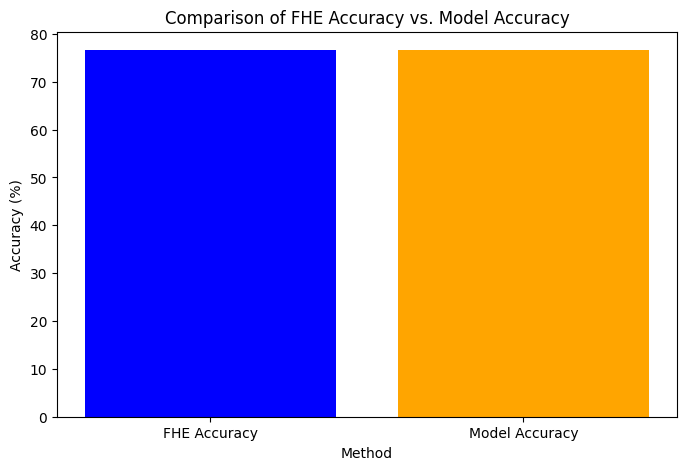

In [ ]:
labels = ['FHE Accuracy', 'Model Accuracy']
values = [fhe_accuracy * 100, accuracy * 100]
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'orange'])
plt.xlabel('Method')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of FHE Accuracy vs. Model Accuracy')
plt.show()